In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from imblearn.ensemble import BalancedBaggingClassifier

In [9]:
data = pd.read_csv('attrition_data.csv', sep = "," , encoding = 'utf-8')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
data.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [13]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [14]:
numCols = data.select_dtypes([np.number]).columns
numCols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Figure size 1296x432 with 0 Axes>

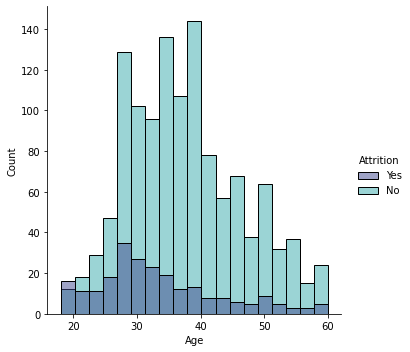

<Figure size 1296x432 with 0 Axes>

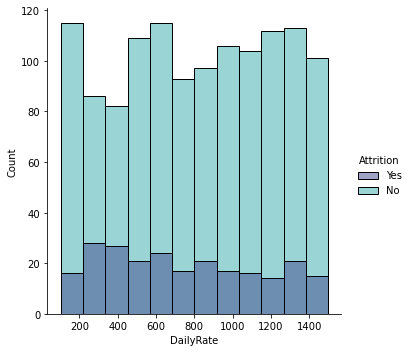

<Figure size 1296x432 with 0 Axes>

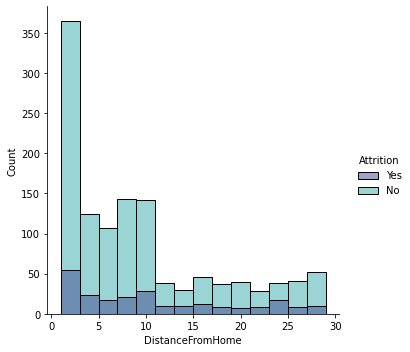

<Figure size 1296x432 with 0 Axes>

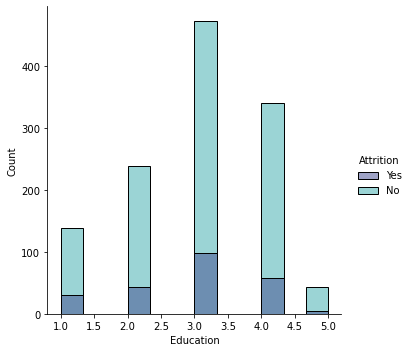

<Figure size 1296x432 with 0 Axes>

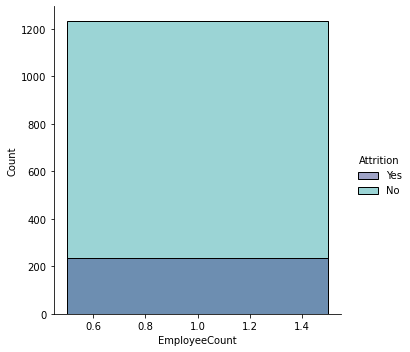

<Figure size 1296x432 with 0 Axes>

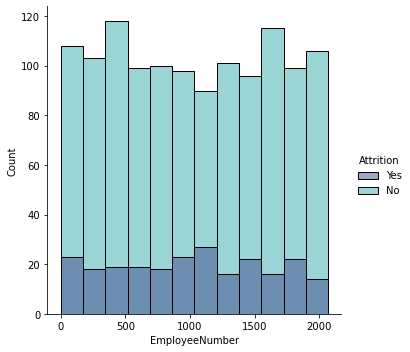

<Figure size 1296x432 with 0 Axes>

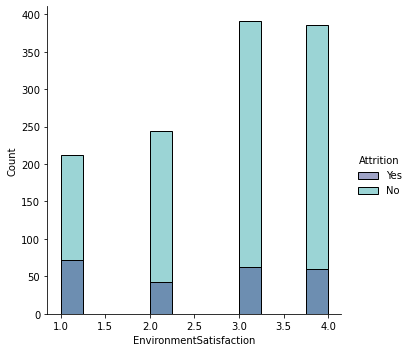

<Figure size 1296x432 with 0 Axes>

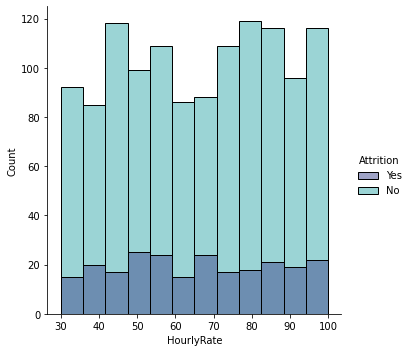

<Figure size 1296x432 with 0 Axes>

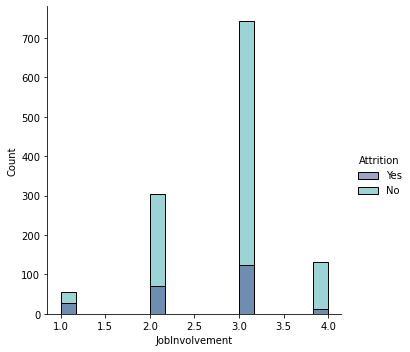

<Figure size 1296x432 with 0 Axes>

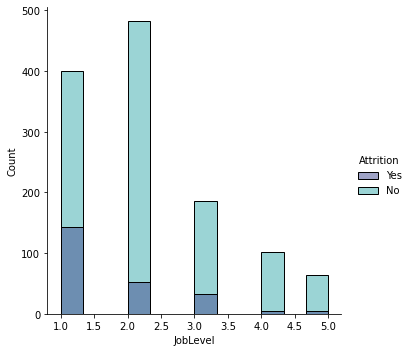

<Figure size 1296x432 with 0 Axes>

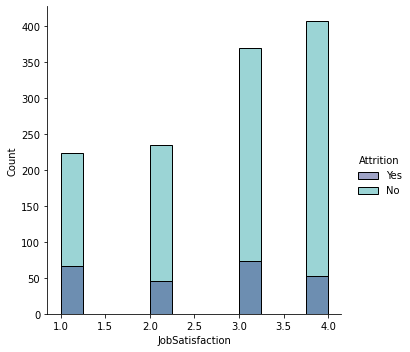

<Figure size 1296x432 with 0 Axes>

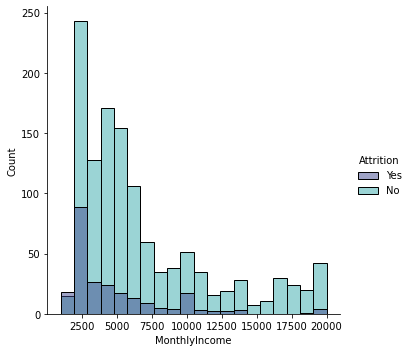

<Figure size 1296x432 with 0 Axes>

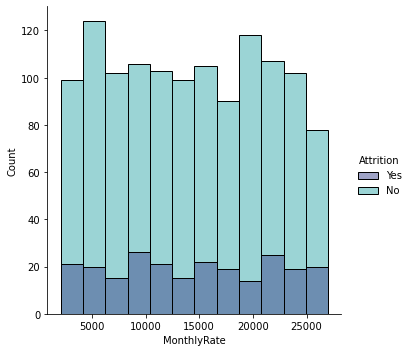

<Figure size 1296x432 with 0 Axes>

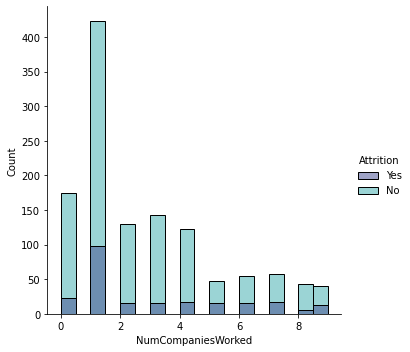

<Figure size 1296x432 with 0 Axes>

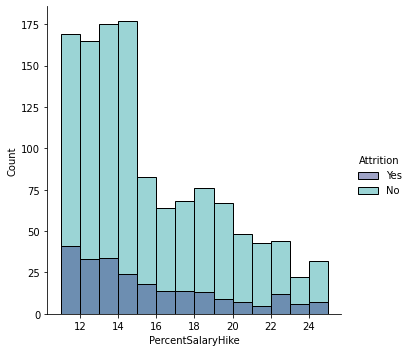

<Figure size 1296x432 with 0 Axes>

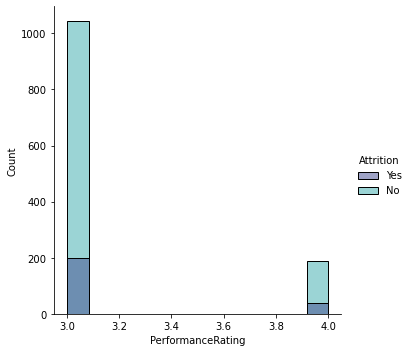

<Figure size 1296x432 with 0 Axes>

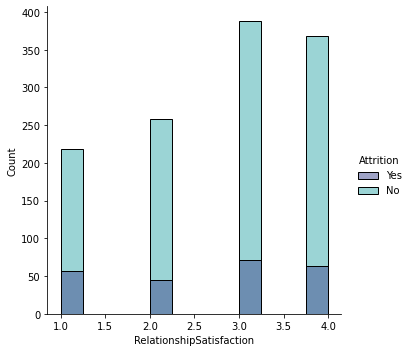

<Figure size 1296x432 with 0 Axes>

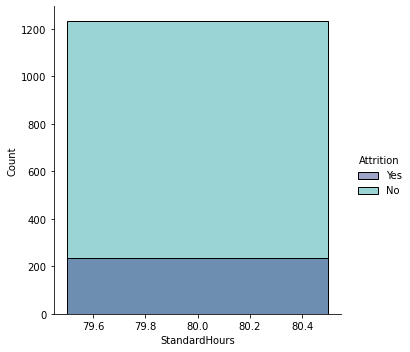

<Figure size 1296x432 with 0 Axes>

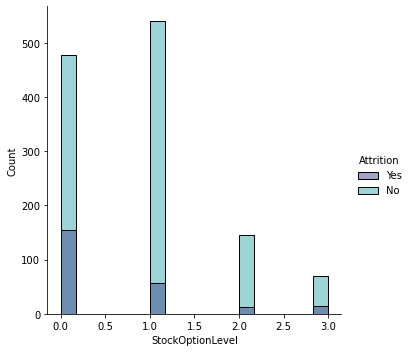

<Figure size 1296x432 with 0 Axes>

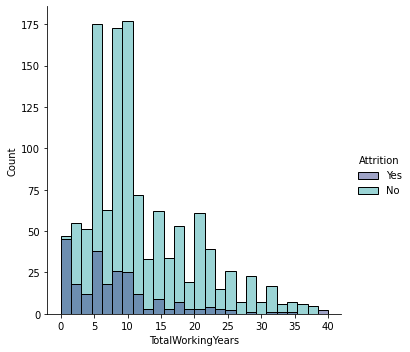

<Figure size 1296x432 with 0 Axes>

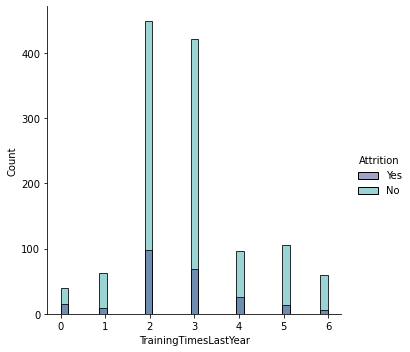

<Figure size 1296x432 with 0 Axes>

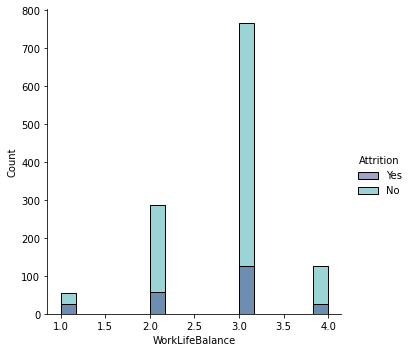

<Figure size 1296x432 with 0 Axes>

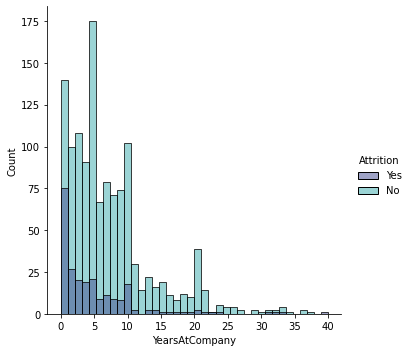

<Figure size 1296x432 with 0 Axes>

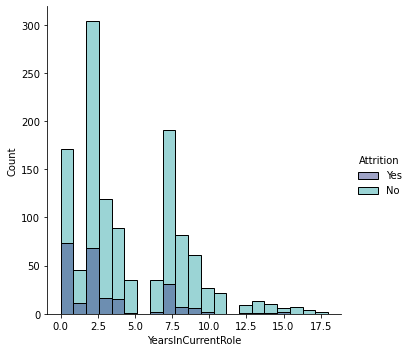

<Figure size 1296x432 with 0 Axes>

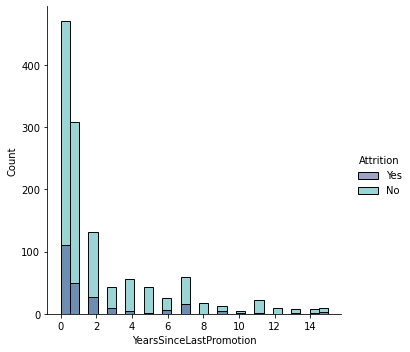

<Figure size 1296x432 with 0 Axes>

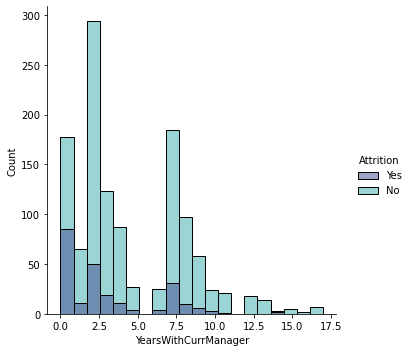

In [15]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=data, palette="mako", hue='Attrition')
    plt.show()

In [16]:
objCols = data.select_dtypes(['object']).columns.drop("Attrition")
objCols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

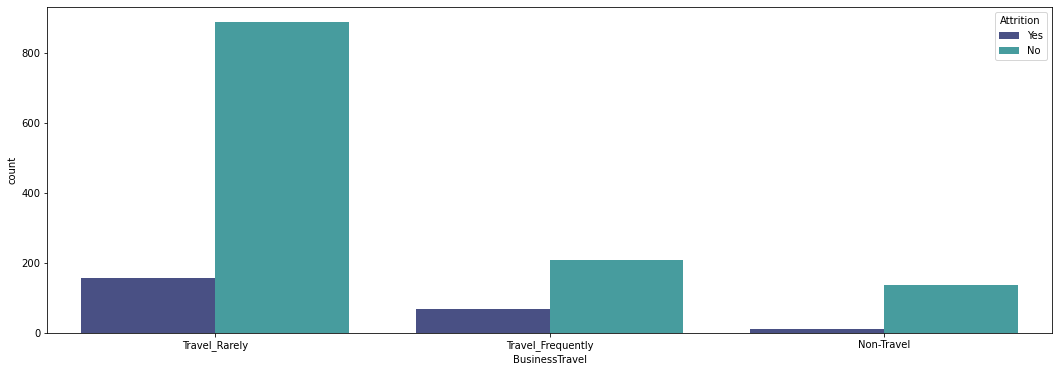

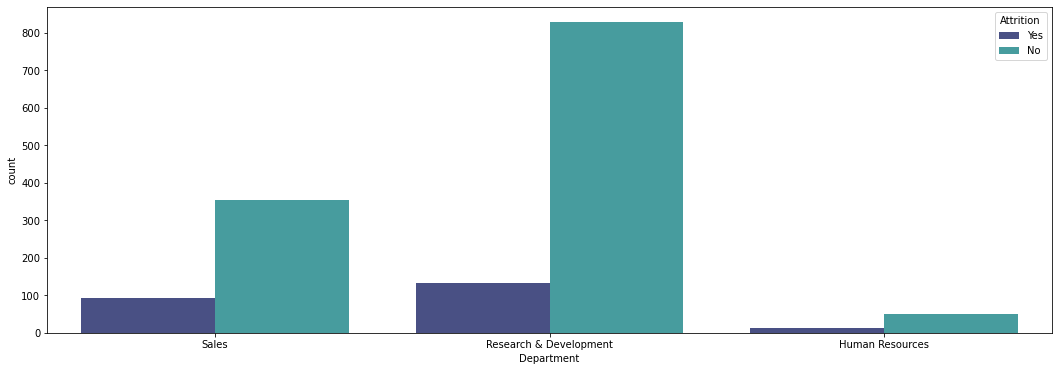

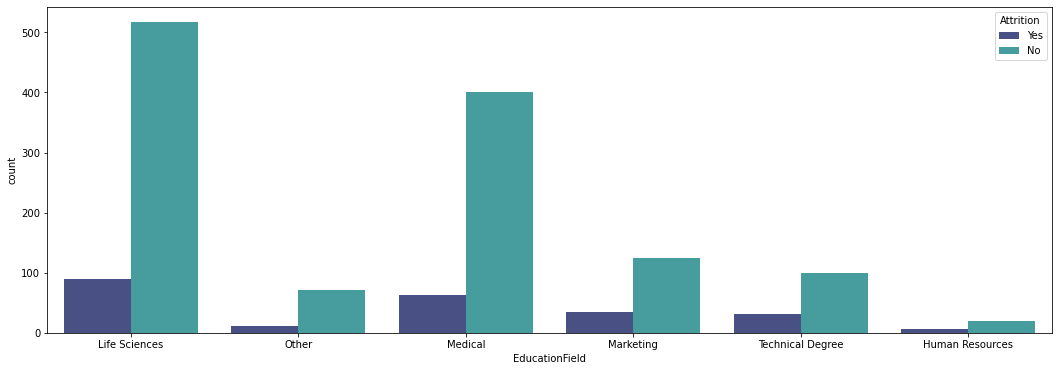

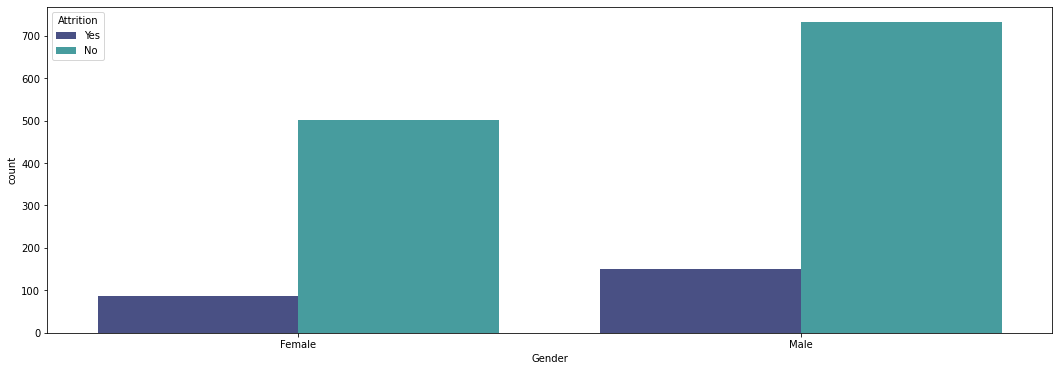

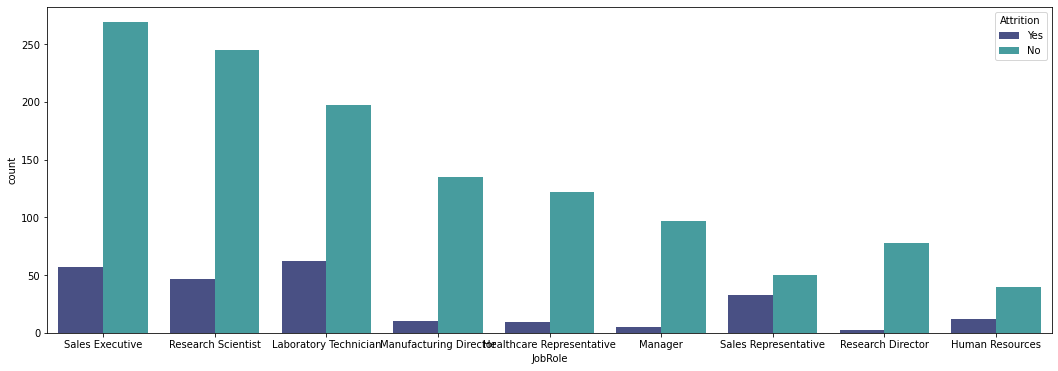

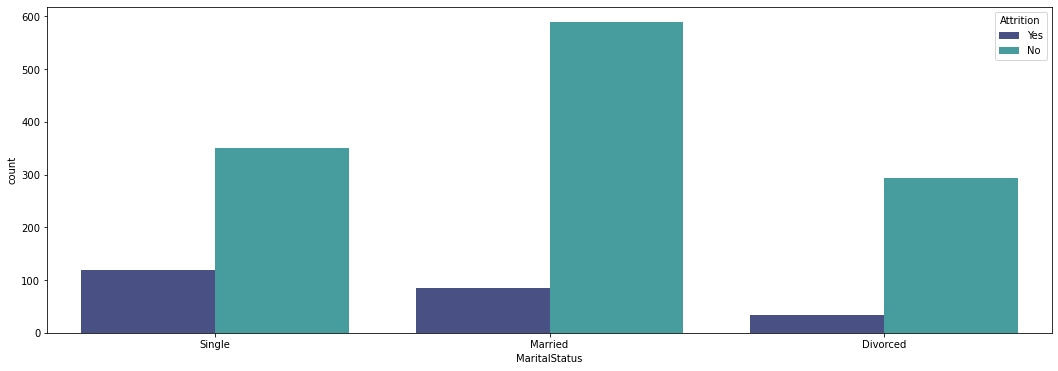

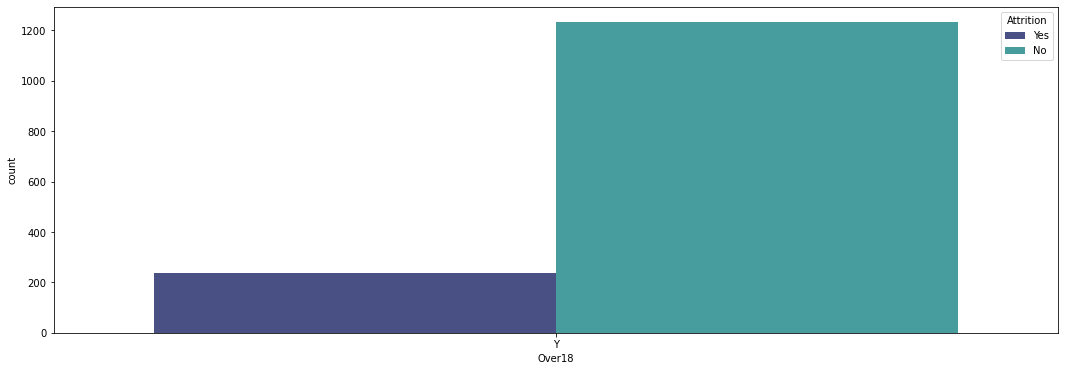

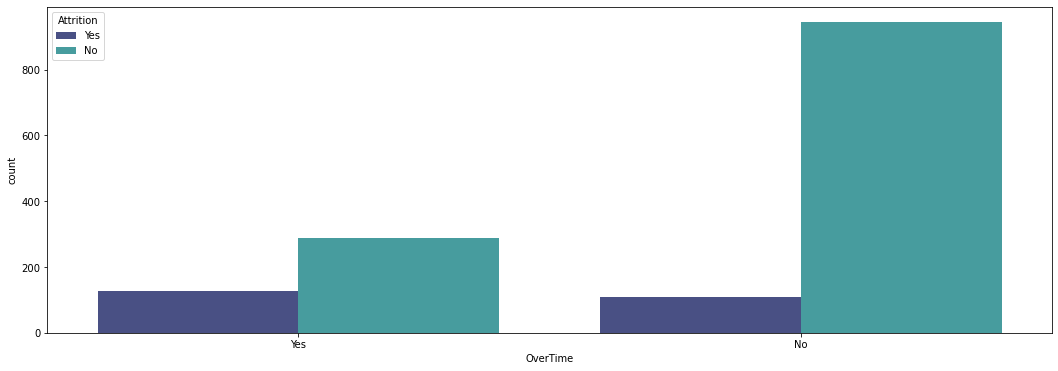

In [17]:
for col in objCols:
    plt.figure(figsize=(18,6))
    sns.countplot(x=col,data=data, palette="mako", hue="Attrition")
    plt.show()

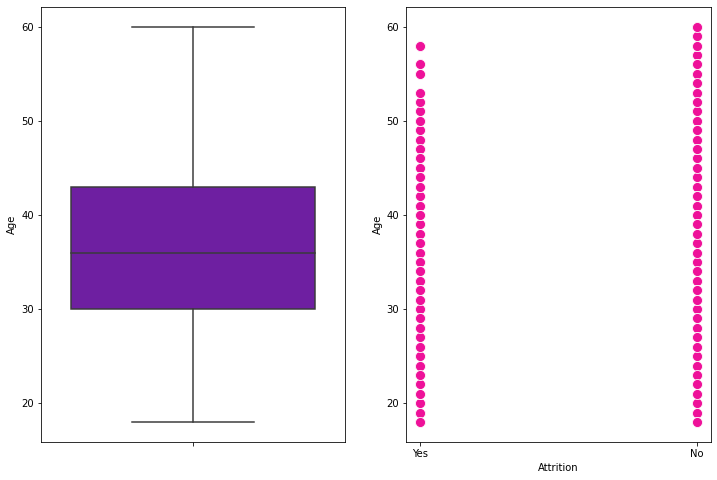

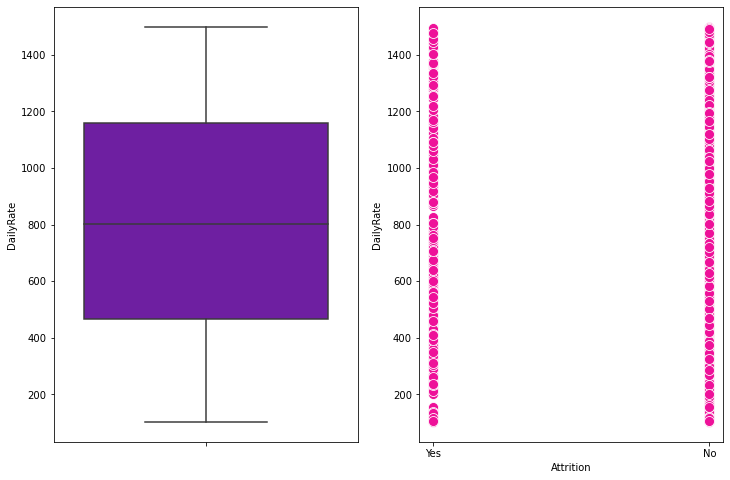

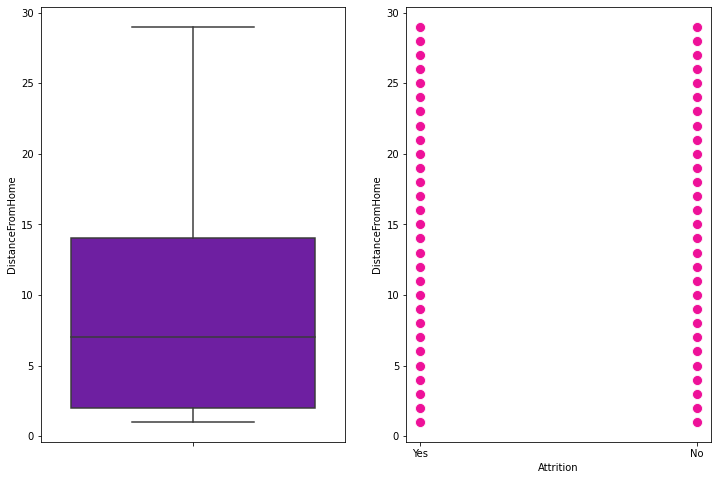

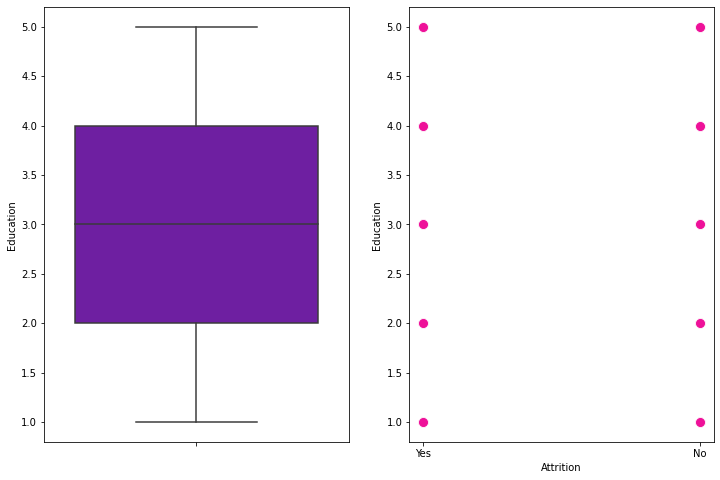

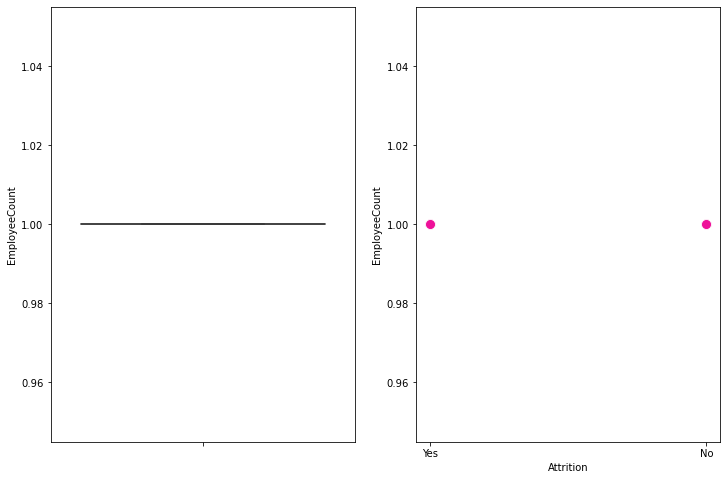

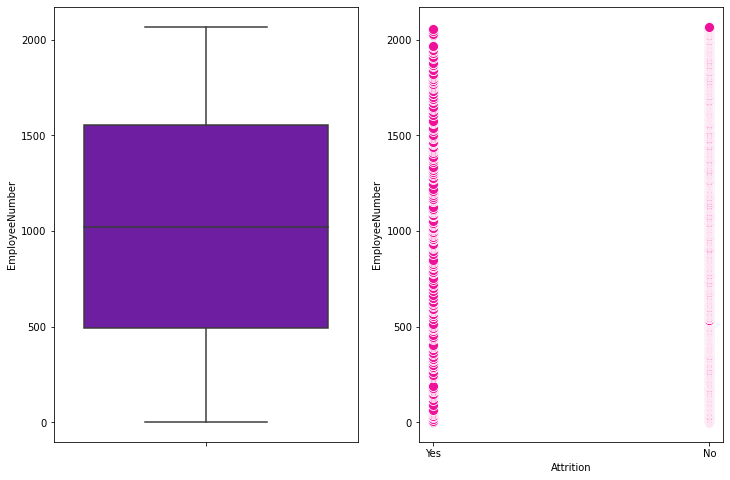

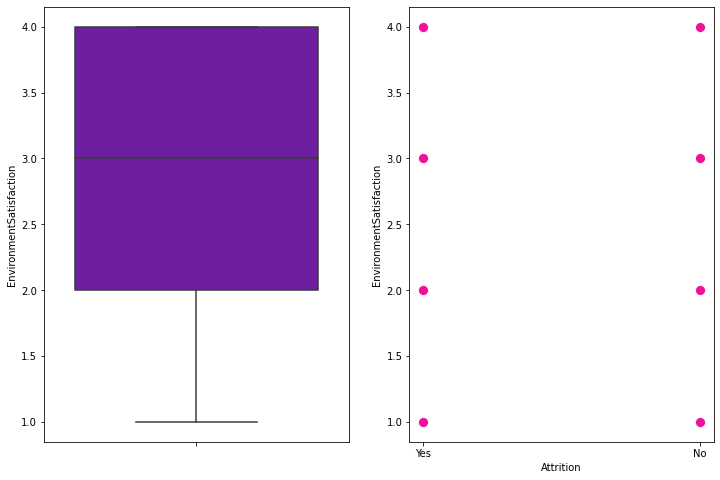

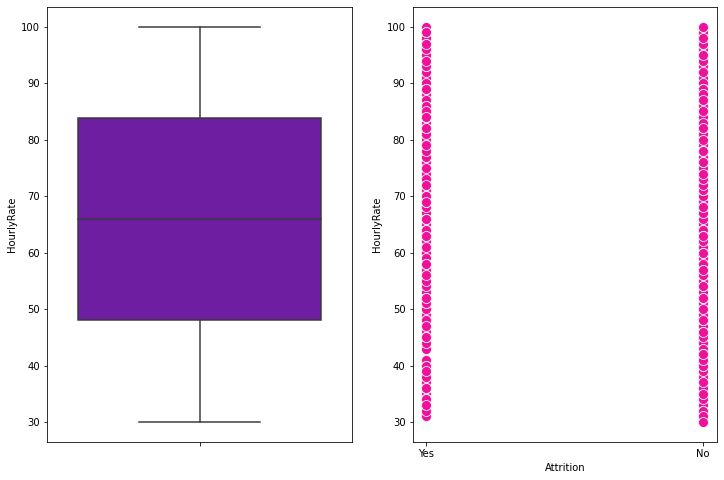

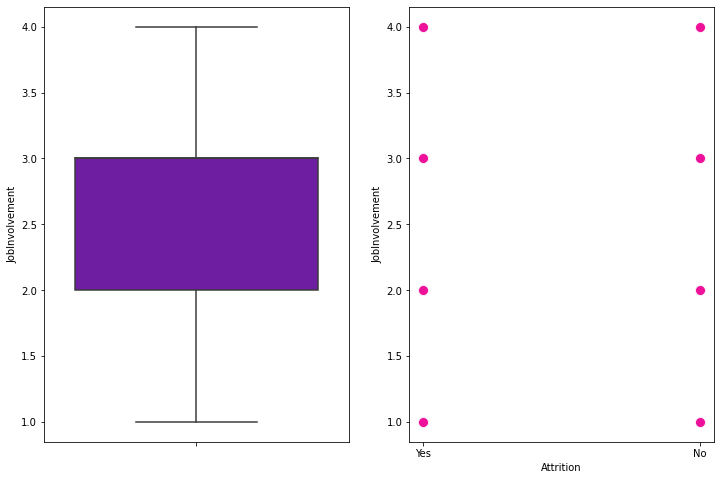

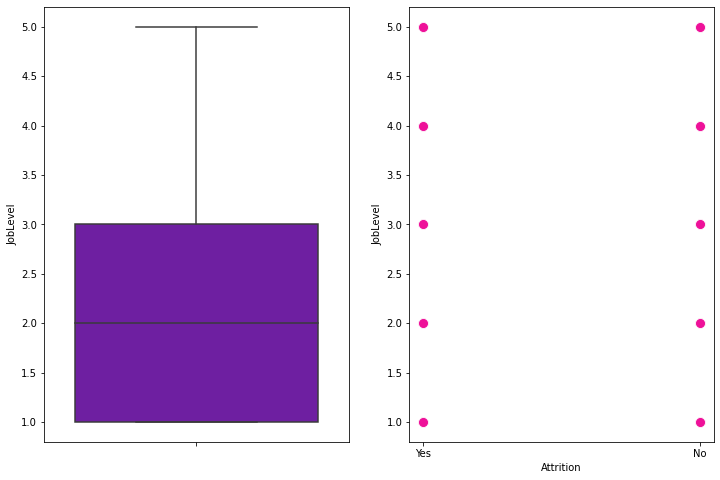

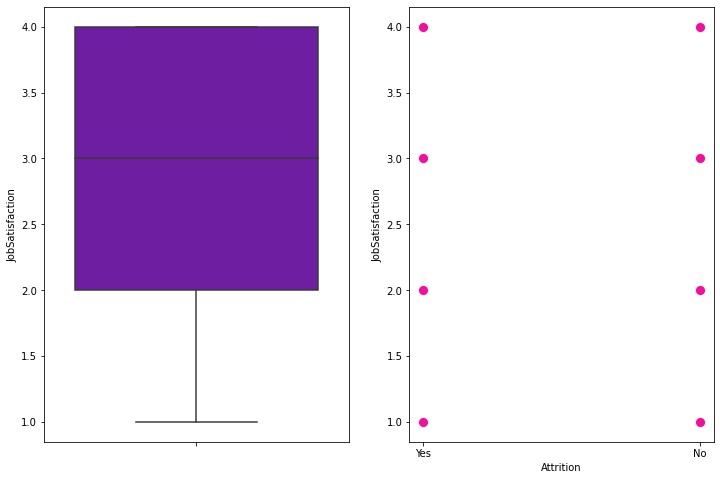

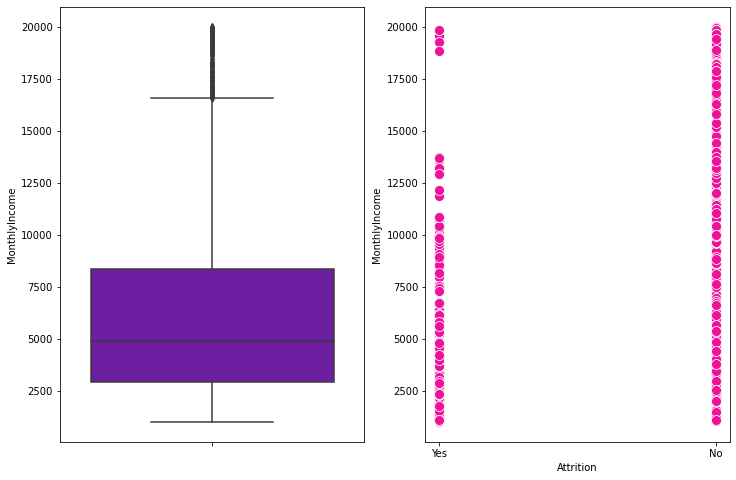

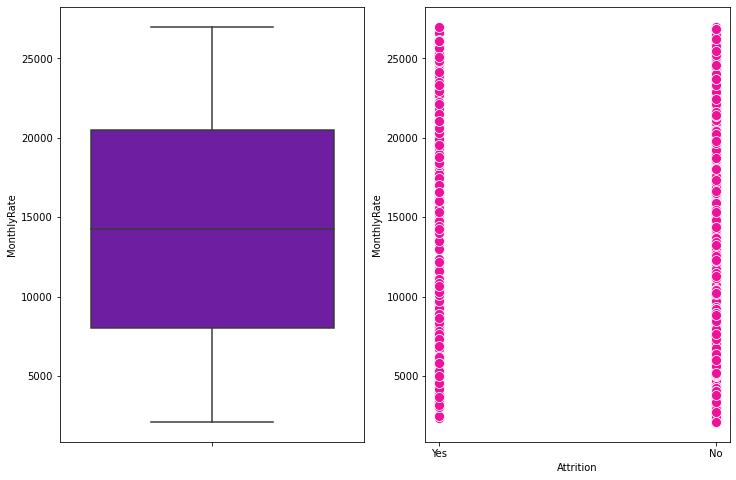

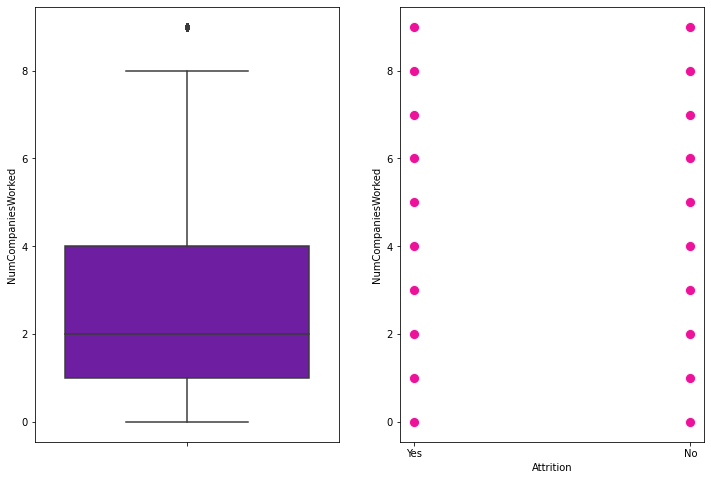

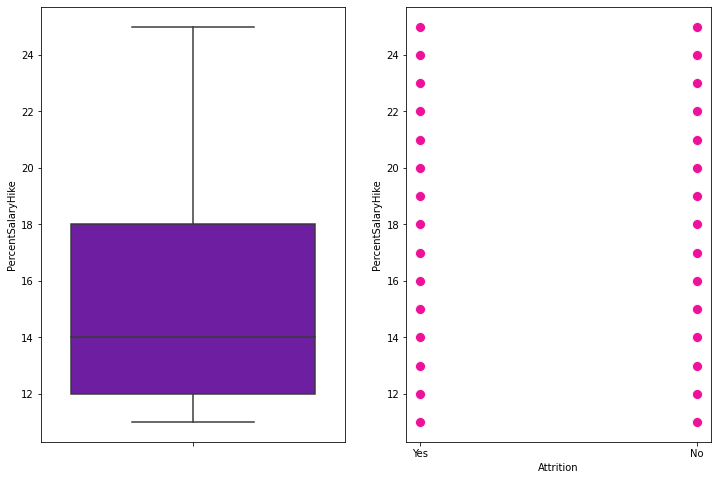

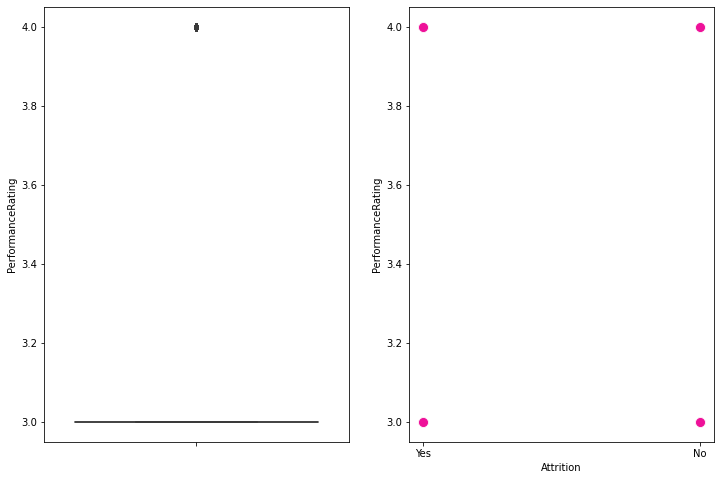

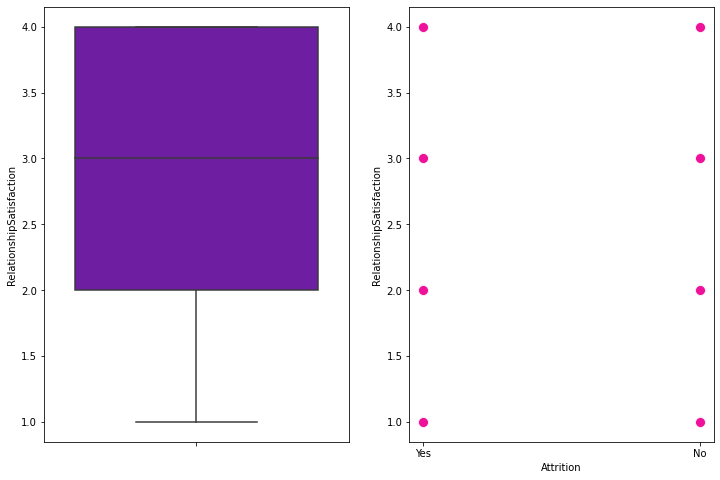

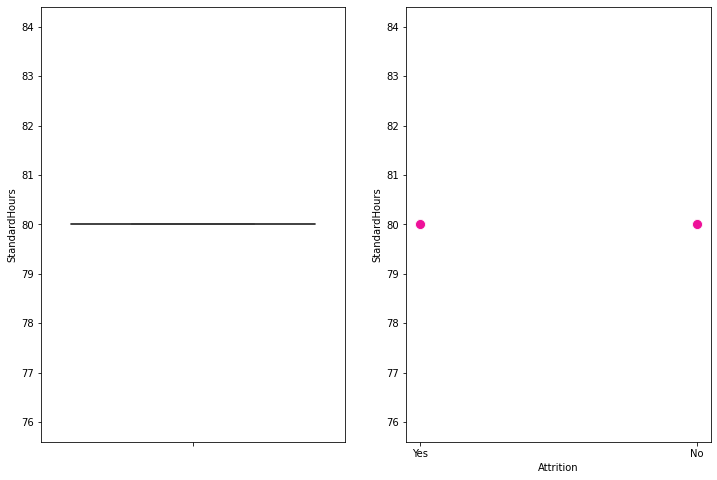

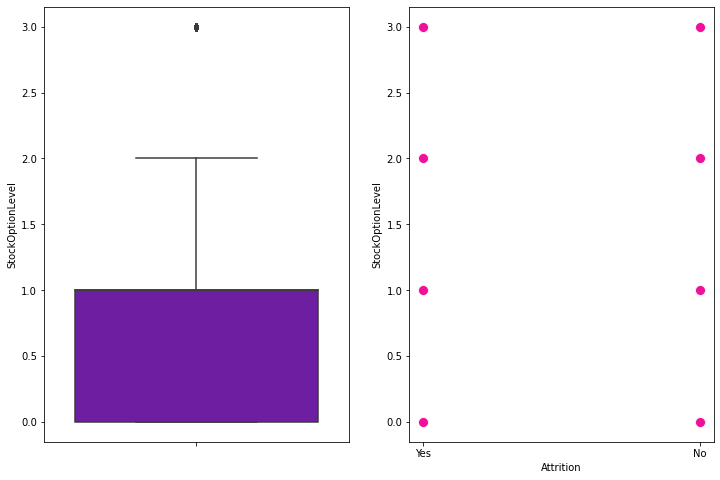

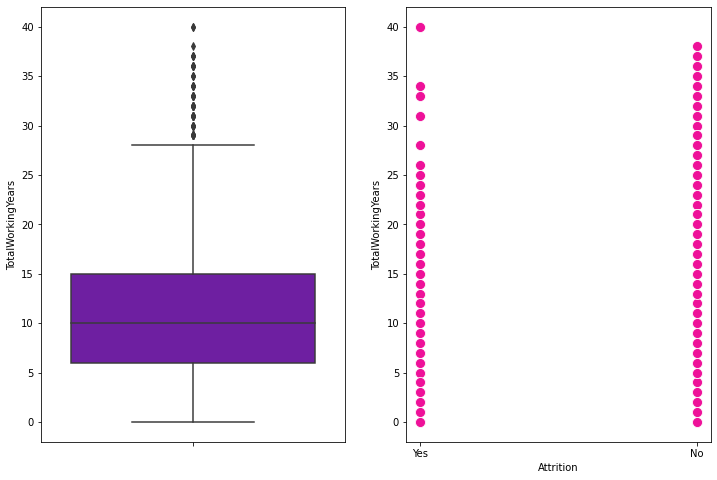

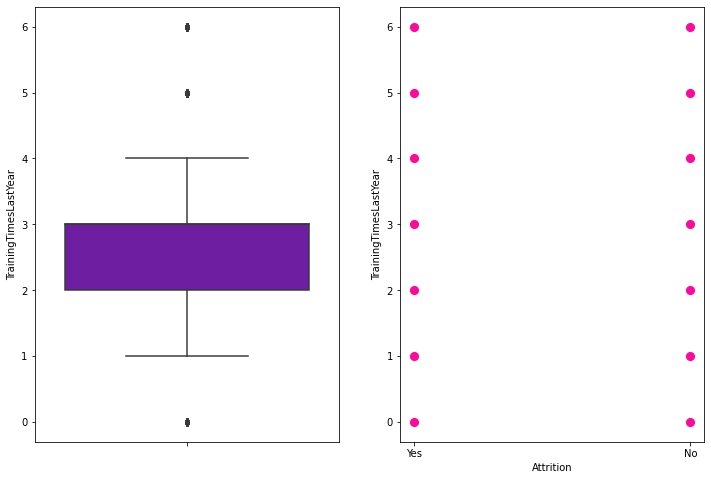

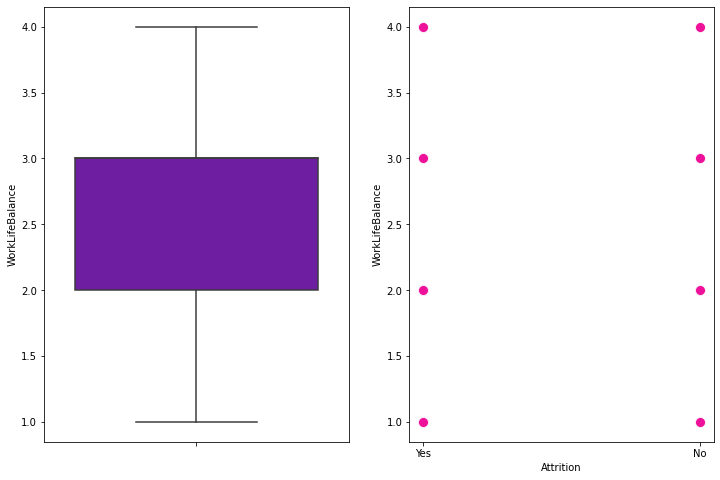

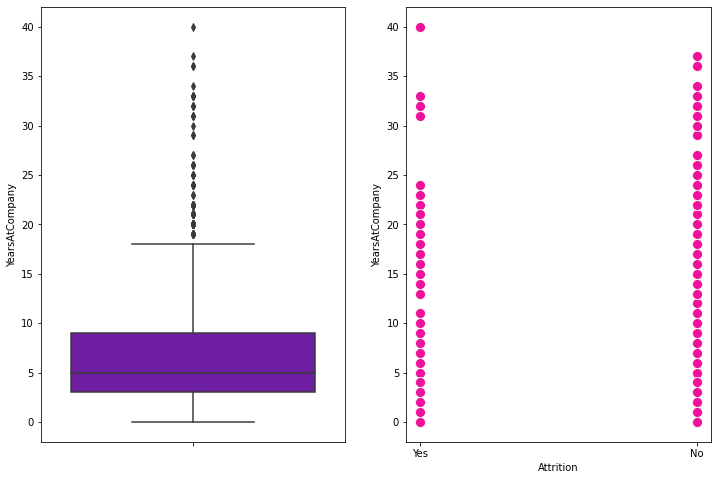

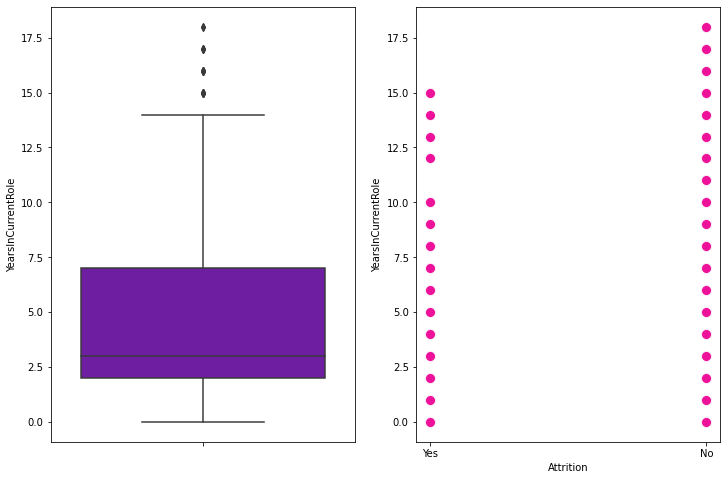

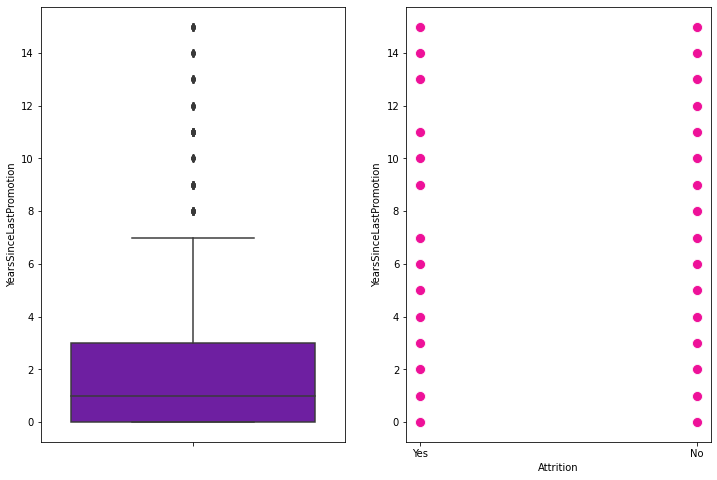

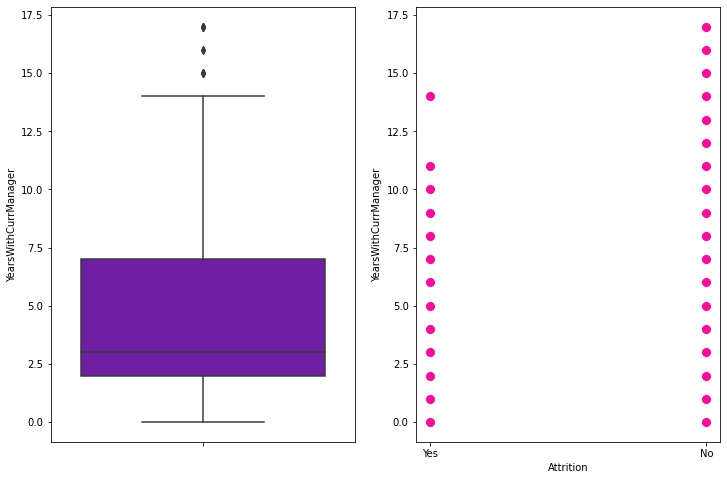

In [18]:
for col in numCols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=data, y=col, ax=ax[0], color='#7209b7')
    sns.scatterplot(data=data,x = 'Attrition', s = 100, y=col, ax=ax[1], color ='#ee1199')
    plt.show()

Handling Outliers from Boxplots

In [20]:
data = data[(data['MonthlyIncome'] <= 180000)]

In [21]:
data = data[(data['NumCompaniesWorked'] <= 8)]

In [22]:
data = data[(data['TotalWorkingYears'] <= 35)]

In [23]:
data = data[(data['YearsInCurrentRole'] <= 17)]

In [24]:
data = data[(data['YearsSinceLastPromotion'] <= 14)]

In [25]:
data = data[(data['YearsWithCurrManager'] <= 15)]

Handling Categorical Values

In [26]:
df = data.copy()

In [27]:
Attrition_le = LabelEncoder()
BusinessTravel_le = LabelEncoder()
Department_le = LabelEncoder()
EducationField_le = LabelEncoder()
Gender_le = LabelEncoder()
JobRole_le = LabelEncoder()
MaritalStatus_le = LabelEncoder()
Over18_le = LabelEncoder()
OverTime_le = LabelEncoder()

In [28]:
df['Attrition'] = Attrition_le.fit_transform(df['Attrition'])
df['BusinessTravel'] = BusinessTravel_le.fit_transform(df['BusinessTravel'])
df['Department'] = Department_le.fit_transform(df['Department'])
df['EducationField'] = EducationField_le.fit_transform(df['EducationField'])
df['Gender'] = Gender_le.fit_transform(df['Gender'])
df['JobRole'] = JobRole_le.fit_transform(df['JobRole'])
df['MaritalStatus'] = MaritalStatus_le.fit_transform(df['MaritalStatus'])
df['Over18'] = Over18_le.fit_transform(df['Over18'])
df['OverTime'] = OverTime_le.fit_transform(df['OverTime'])

In [29]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,0,1,1005,1,2,2,1,1,8,...,3,80,0,8,2,2,7,7,3,6


Correlation Analysis

<AxesSubplot:>

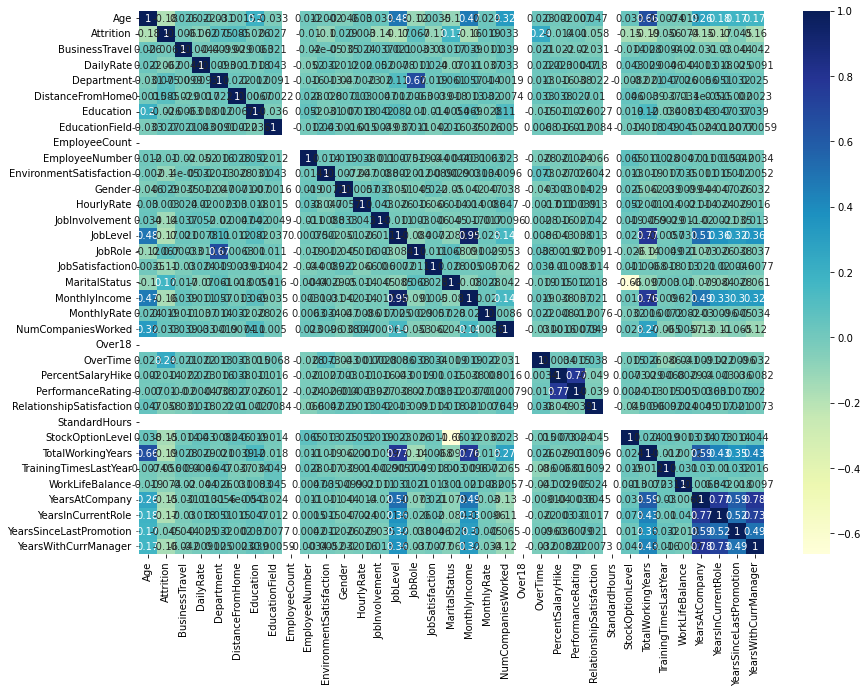

In [30]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu")

In [31]:
round(abs(df.corr()['Attrition']*100).sort_values(ascending=False), 2)


Attrition                   100.00
OverTime                     23.74
TotalWorkingYears            18.54
Age                          17.65
JobLevel                     17.42
YearsInCurrentRole           17.33
MaritalStatus                16.68
MonthlyIncome                16.24
YearsWithCurrManager         15.71
YearsAtCompany               15.49
StockOptionLevel             15.40
JobInvolvement               13.64
JobSatisfaction              10.87
EnvironmentSatisfaction       9.95
DistanceFromHome              8.45
Department                    7.53
WorkLifeBalance               7.39
JobRole                       6.68
DailyRate                     6.15
RelationshipSatisfaction      5.82
TrainingTimesLastYear         5.60
YearsSinceLastPromotion       4.49
NumCompaniesWorked            3.28
Gender                        2.91
EducationField                2.66
Education                     2.59
MonthlyRate                   1.88
PercentSalaryHike             1.43
EmployeeNumber      

<AxesSubplot:>

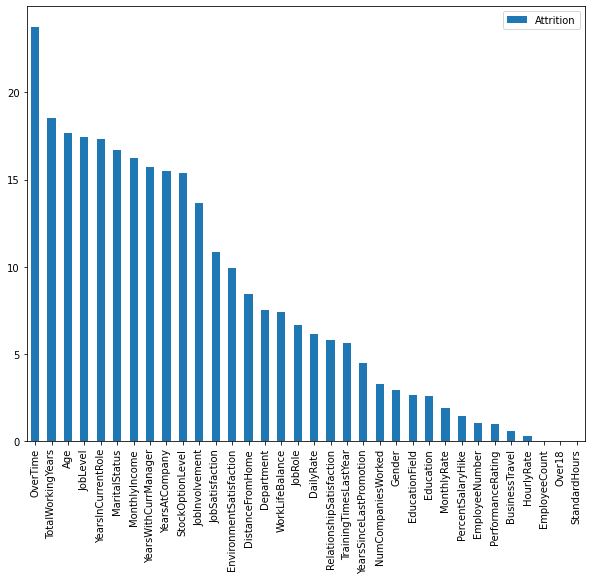

In [32]:
pd.DataFrame(abs(df.corr()['Attrition'].drop('Attrition')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

In [33]:
mdf = df[['Attrition', 'OverTime',  'TotalWorkingYears',  'Age',  'JobLevel',  'YearsInCurrentRole',  'MaritalStatus',  'MonthlyIncome',  'YearsWithCurrManager',  'YearsAtCompany',  'StockOptionLevel',  'JobInvolvement',  'JobSatisfaction',  'EnvironmentSatisfaction',  'DistanceFromHome',  'Department',  'WorkLifeBalance',  'JobRole',  'DailyRate',  'RelationshipSatisfaction',  'TrainingTimesLastYear',]]
mdf

,Attrition,OverTime,TotalWorkingYears,Age,JobLevel,YearsInCurrentRole,MaritalStatus,MonthlyIncome,YearsWithCurrManager,YearsAtCompany,...,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,Department,WorkLifeBalance,JobRole,DailyRate,RelationshipSatisfaction,TrainingTimesLastYear
0,1,1,8,41,2,4,2,5993,5,6,...,3,4,2,1,2,1,7,1102,1,0
1,0,0,10,49,2,7,1,5130,7,10,...,2,2,3,8,1,3,6,279,4,3
2,1,1,7,37,1,0,2,2090,0,0,...,2,3,4,2,1,3,2,1373,2,3
3,0,1,8,33,1,7,1,2909,0,8,...,3,3,4,3,1,3,6,1392,3,3
5,0,0,8,32,1,7,2,3068,6,7,...,3,4,4,2,1,2,2,1005,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,0,17,36,2,2,1,2571,3,5,...,4,4,3,23,1,3,2,884,3,3
1466,0,0,9,39,3,7,1,9991,7,7,...,2,1,4,6,1,3,0,613,1,5
1467,0,1,6,27,2,2,1,6142,3,6,...,4,2,2,4,1,3,4,155,2,0
1468,0,0,17,49,2,6,1,5390,8,9,...,2,2,4,2,2,2,7,1023,4,3


Designing the model

In [34]:
x = mdf.drop(['Attrition'] , axis = 1).values
y = mdf['Attrition' ].values

In [35]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)
[x_train.shape, y_train.shape]

[(1038, 20), (1038,)]

In [36]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
[x_train.shape, x_test.shape]

[(1038, 20), (347, 20)]

Logistic Regression Model

In [37]:
lr = LogisticRegression(C = 100)

In [38]:
lr.fit(x_train , y_train)

LogisticRegression(C=100)

In [39]:
lr.score(x_train , y_train)

0.8853564547206165

In [40]:
lr.score(x_test , y_test)

0.8501440922190202